## 사전 데이터 설정

In [24]:
import tensorflow as tf
from tensorflow import keras

In [25]:
# 데이터 불러오기
cifar10 = keras.datasets.cifar10

In [26]:
# train과 test로 분리하기
(train_input, train_target), (test_input, test_target) = cifar10.load_data()

In [27]:
# 데이터 크기 확인하기
print("훈련 데이터 크기  : ", train_input.shape, train_target.shape)
print("테스트 데이터 크기: ", test_input.shape, test_target.shape)

훈련 데이터 크기  :  (50000, 32, 32, 3) (50000, 1)
테스트 데이터 크기:  (10000, 32, 32, 3) (10000, 1)


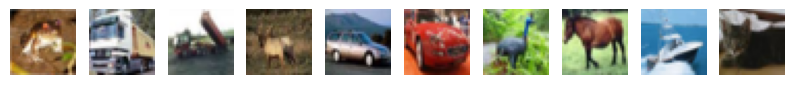

In [28]:
# 데이터 샘플 10개 확인해보기
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [29]:
# 10개의 훈련 데이터의 타깃값 확인하기
print([train_target[i][0] for i in range(10)])

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3]


In [30]:
# 각 항목 별 개수 확인하기
import numpy as np

print("각 항목 별 개수 : ", np.unique(train_target, return_counts=True))

각 항목 별 개수 :  (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))


In [31]:
# 검증 데이터 설정
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2)

In [32]:
# 데이터 크기 확인하기
print("훈련 데이터 크기: ", train_input.shape, train_target.shape)
print("테스트 데이터 크기: ", test_input.shape, test_target.shape)
print("검증 데이터 크기: ", val_input.shape, val_target.shape)

훈련 데이터 크기:  (40000, 32, 32, 3) (40000, 1)
테스트 데이터 크기:  (10000, 32, 32, 3) (10000, 1)
검증 데이터 크기:  (10000, 32, 32, 3) (10000, 1)


## 데이터 정규화

In [33]:
# 픽셀값 0~1로 설정
train_scaled = train_input / 255.0
test_scaled = test_input / 255.0
val_scaled = val_input / 255.0

In [34]:
print("훈련 0번: ", np.min(train_scaled[0]), np.max(train_scaled[0]))
print("훈련 1번: ", np.min(train_scaled[1]), np.max(train_scaled[1]))

훈련 0번:  0.08627450980392157 1.0
훈련 1번:  0.1568627450980392 1.0


## 모델 정의

In [35]:
# 객체 생성
model = keras.Sequential()

In [36]:
# 합성곱 층 추가
# (32,32,3) --필터32개--> (32,32,32)
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                            padding='same', input_shape=(32,32,3)))

# (2,2) 최대풀링
# (32,32,32) --(2,2)풀링--> (16,16,32)
model.add(keras.layers.MaxPooling2D(2))

In [37]:
# 두번째 합성곱 층 추가
# (16,16,32) --필터64개--> (16,16,64)
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',
                            padding='same'))

# (2,2) 최대풀링
# (16,16,64) --(2,2)풀링--> (8,8,64)
model.add(keras.layers.MaxPooling2D(2))

In [38]:
# Flatten 층 추가
model.add(keras.layers.Flatten())

# 밀집층 추가
model.add(keras.layers.Dense(100, activation='relu'))

# 드롭아웃 추가
# 드롭아웃 통해 과대적합 막아 성능 개선
model.add(keras.layers.Dropout(0.4))

# 두번째 밀집층 추가
# 클래스 개수(10개)와 동일한 출력층
model.add(keras.layers.Dense(10, activation='softmax'))

In [39]:
#모델 구조
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 4096)              0         
                                                                 
 dense_4 (Dense)             (None, 100)              

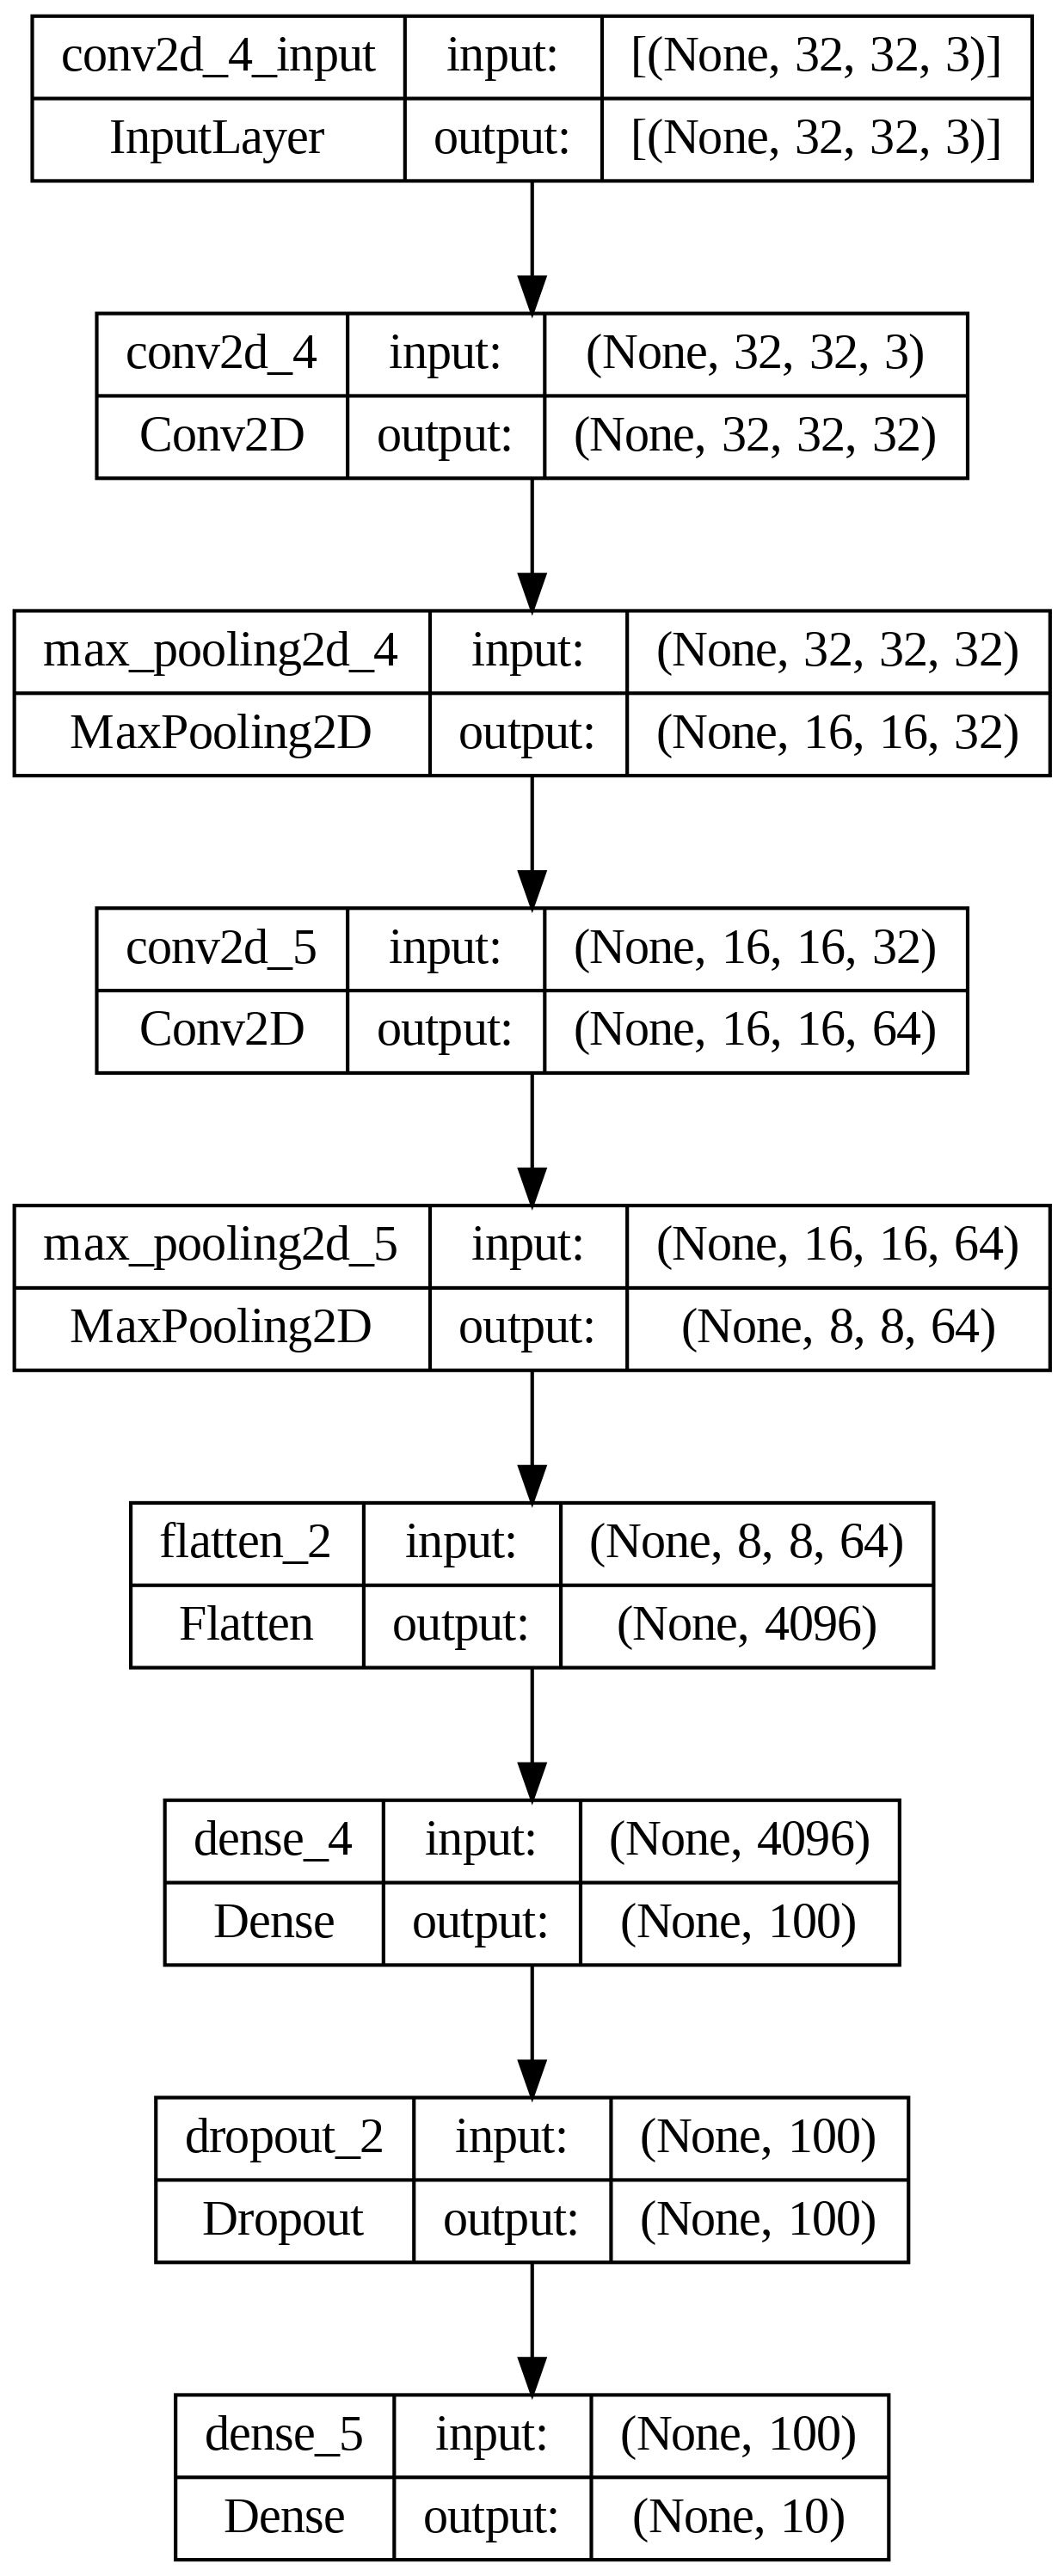

In [40]:
# 구조 시각화
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-model.png', dpi=300)